Add you import statements in the below code block. Please make sure to import Precode.

In [114]:
# import code here
from precode import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = np.load('AllSamples.npy')

Below cell contains starter code to generate the initial centers. 

* Please do not change anything apart from the student ID.

* The initial centers will be in a dictionary with keys being 'k' and value being the centers.


In [115]:
initial_centers = {}
for k in range(2, 11):
    centers = initial_S1("1391", k)  # please replace 0111 with your last four digit of your ID
    initial_centers[k] = centers

Print the last 4 digits of your student id as string in the cell below. Please make sure to only have one print statement in the cell below.

In [116]:
### TEST FUNCTION: test_student_id
# DO NOT REMOVE THE ABOVE LINE
print("1391")

1391


Add your code for computing the kMeans final centroids and loss functions in the code block below.

In [117]:
final_centroids = {}
cluster_datapoints = {}
losses = {}

# K-means clustering
for k in initial_centers.keys(): 
    
    centroids = initial_centers[k]   
    
    for i in range(100):
        min_distance_index = []
        classified_cluster_datapoints = []
        datapoint_to_centroids_distances = []
        
        for x in data:
            #calculate the distance from one datapoint (x) to all centroids (centroids array)
            euclidean_distance = np.sqrt(np.sum((x - centroids)**2, axis=1))
            datapoint_to_centroids_distances.append(euclidean_distance)

        #get the index of the smallest distance value among all the calcualted distances from one datapoint to all centroids
        min_distance_index = np.argmin(datapoint_to_centroids_distances, axis=1)
        
        for i in range(k):
            # assign each datapoint to its nearest centroid. classified_cluster_datapoints is an array of clusters, each cluster is an array of datapoints
            classified_cluster_datapoints.append(data[min_distance_index==i])

        # determine the new centroids based on the mean of each group of classified datapoints
        updated_centroids = [np.mean(classified_cluster_datapoints[i], axis=0) for i in range(k)]
        if np.all(np.absolute(np.array(centroids) - np.array(updated_centroids)) < 0.00005):
            break
        centroids = updated_centroids
    
    final_centroids[k] = centroids
    cluster_datapoints[k] = classified_cluster_datapoints
    
    # calculate the loss for each k clusters value
    loss = []
    for i in range(len(updated_centroids)):
        l = np.sum((classified_cluster_datapoints[i] - updated_centroids[i])**2)
        loss.append(l)
    losses[k] = np.sum(loss)

Please use the following cell to print all the final centeriods for k in the range of 2 to 10, both inclusive.

**Notes:**
* The centeriods should have the following format: `[[x1,y1],[x2,y2],[x3,y3]][[x1,y1],[x2,y2],[x3,y3]]`
* The order of the centeriod does not matter but do NOT change the order for `x` and `y` coordinate.
* Please print the centroids from k=2 to k=10 in order and each on a new line.
* Do not print anything else in the code cell below.

**Output format:**

[[x1, y1], [x2, y2]]

[[x1, y1], [x2, y2], [x3, y3]]

.

.

.

[[x1,y1], [x2,y2].....[x9,y9]]

In [118]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE THE ABOVE LINE
for k,centroids in final_centroids.items():
    c = [list(i) for i in centroids]
    print(c)

[[5.000562341588762, 2.4854274751531933], [4.852611930287174, 7.271641711202775]]
[[6.497249620849709, 7.522972929895171], [2.5614644894663545, 6.088613382895479], [5.477400388679034, 2.254981027984723]]
[[7.414192434680615, 2.3216911383868664], [6.603458393504191, 7.570421042158782], [3.363732738227625, 2.596467059856793], [2.8585923471789103, 6.931365250947319]]
[[5.296298780069163, 6.649087966552475], [7.756483249146484, 8.556689279063415], [2.5197611640819364, 7.0202890945043475], [7.380762638700798, 2.332455315679148], [3.313432470175547, 2.5403485617921966]]
[[6.7786424038212285, 8.079676411164815], [3.1660397272577874, 0.8616886118323305], [7.556167822397726, 2.235167959857534], [5.223212739403405, 4.2250282852390075], [2.8749081274874264, 7.010822811156844], [2.214068054222364, 3.286445548570339]]
[[5.2402829638043125, 7.531310293267821], [7.914309977818314, 8.519909807700076], [2.183214622031253, 7.703553409180906], [3.00060229054155, 5.782957863293782], [2.736250054522389, 1.

Please use the following cell to print all the final loss functions for k in the range of 2 to 10, both inclusive.

**Notes:**

* Print the loss functions for every value of k on a new line and in order.
* Do not print anything else in the code cell below.

**Output format:**

L1

L2

.

.

.

L9


In [119]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE THE ABOVE LINE
for k,loss in losses.items():
    print(loss)

1921.0334858562062
1293.777452391135
788.2716400494818
614.1319582649026
498.4943773559179
399.3736198742493
354.8890817380169
232.27848278050436
219.08352051428562


**This part of the project is manually graded.**

Use the cells below to write the code for generating the loss function plot.

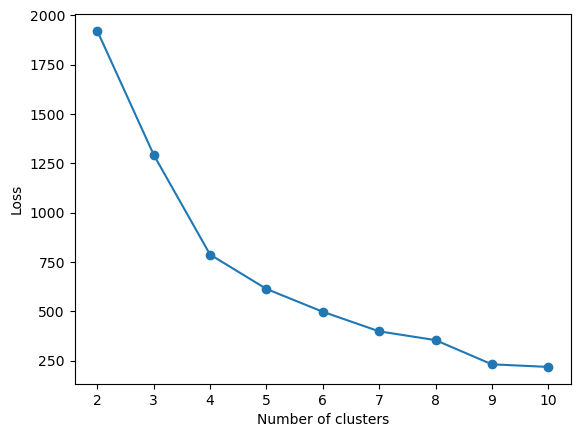

In [120]:
cluster_num = [k for k in initial_centers.keys()]
plt.plot(cluster_num, losses.values(), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Loss")
plt.show()

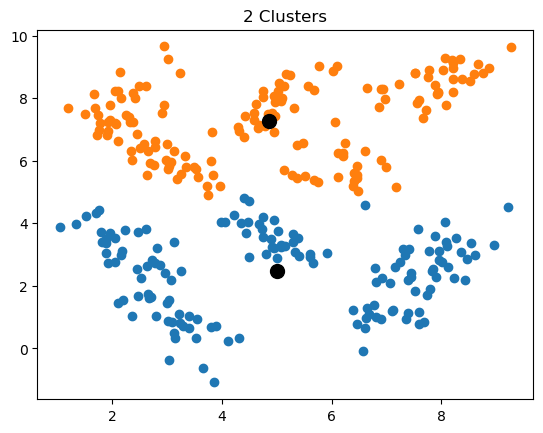

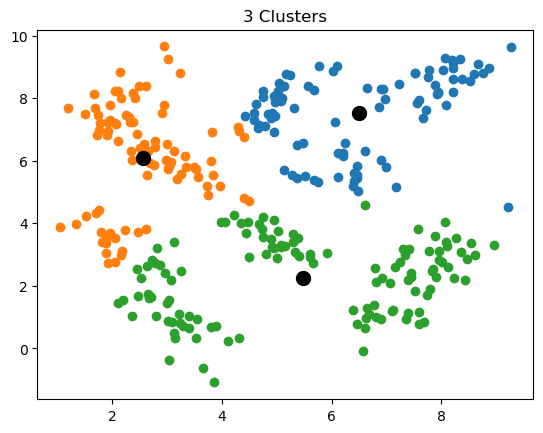

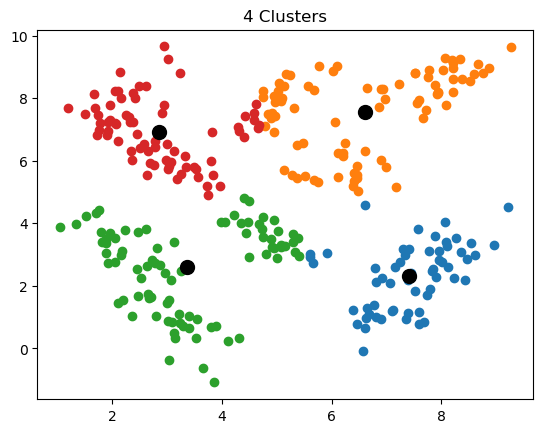

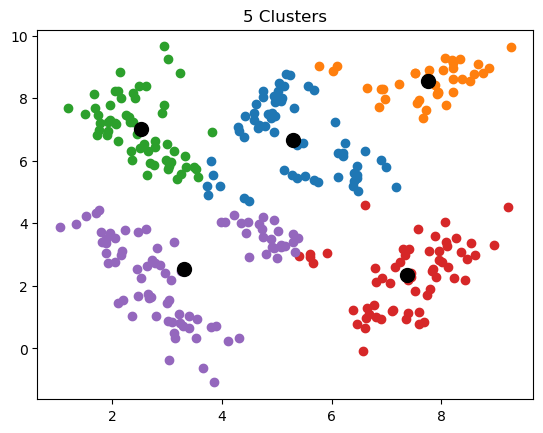

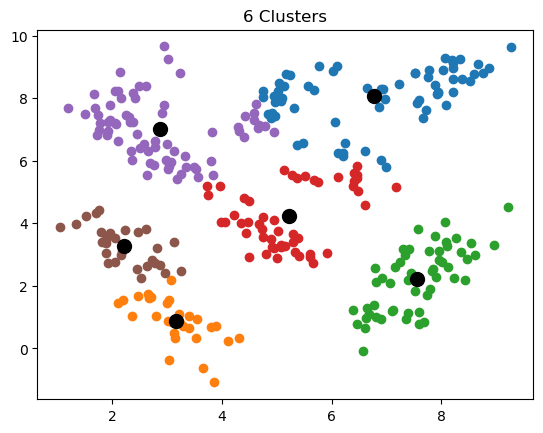

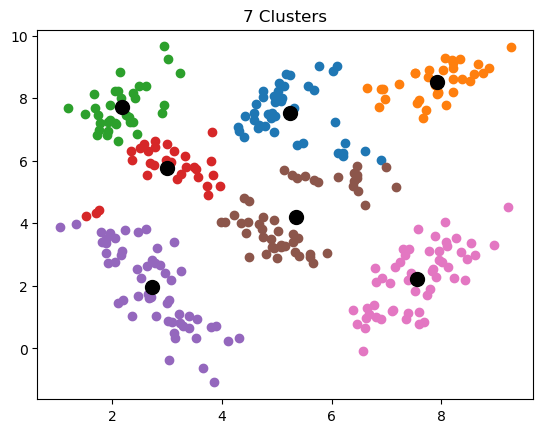

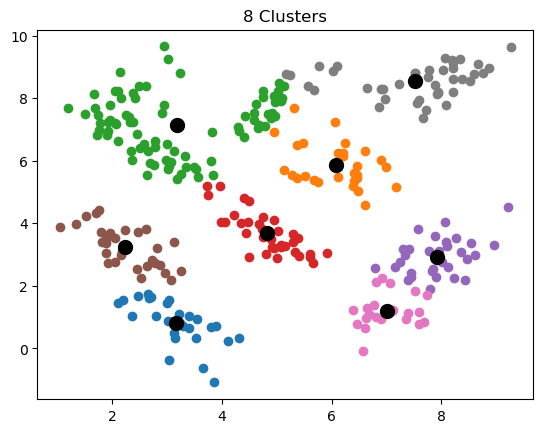

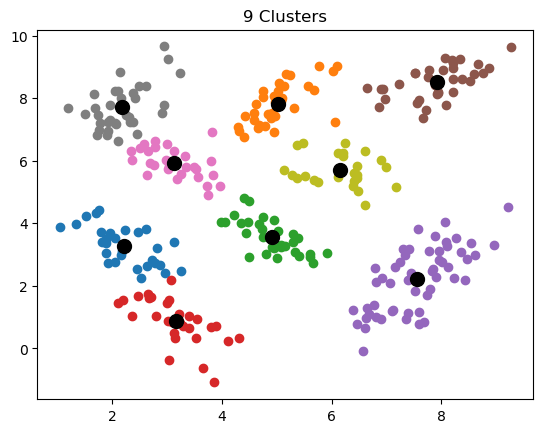

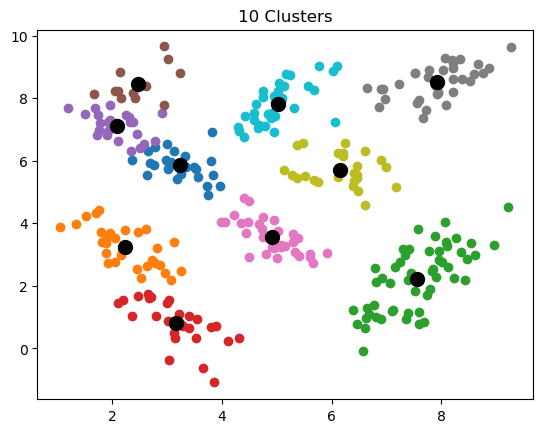

In [121]:
for  k in final_centroids.keys():
    for i,cluster in enumerate(cluster_datapoints[k]):
        x = [i[0] for i in cluster]
        y = [i[1] for i in cluster]
        plt.scatter(x,y)
    
    cx = [i[0] for i in final_centroids[k]]
    cy = [i[1] for i in final_centroids[k]]
    plt.scatter(cx,cy, s=100, color="black")
    plt.title(label=(str(k)+' Clusters'))
    #plt.legend()
    plt.show()